In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

import pandas as pd
from preprocessing import prepare_data, prepare_data_neural_only
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Load data
X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()

# Classic SVM (linear kernel)

In [ ]:
# Train SVM with C = 1
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [6]:
# Predictions
y_pred = svm.predict(X_test)

In [7]:
# Evaluation
print(classification_report(y_test, y_pred, target_names=['Incorrect', 'Correct']))

              precision    recall  f1-score   support

   Incorrect       0.00      0.00      0.00        11
     Correct       0.72      1.00      0.84        29

    accuracy                           0.73        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(f"  True Negatives: {cm[0,0]}")
print(f"  False Positives: {cm[0,1]}")
print(f"  False Negatives: {cm[1,0]}")
print(f"  True Positives: {cm[1,1]}")

  True Negatives: 0
  False Positives: 11
  False Negatives: 0
  True Positives: 29


In [11]:
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2%} (± {cv_scores.std():.2%})")
print(f"Overfitting Check: {train_acc - test_acc:+.2%}")

Training Accuracy: 72.50%
Test Accuracy: 72.50%
Cross-Validation Accuracy: 71.88% (± 1.98%)
Overfitting Check: +0.00%


SVM requires tuning of the hyperparameter C. Let us try to find what choice of C works best using cross-validation.

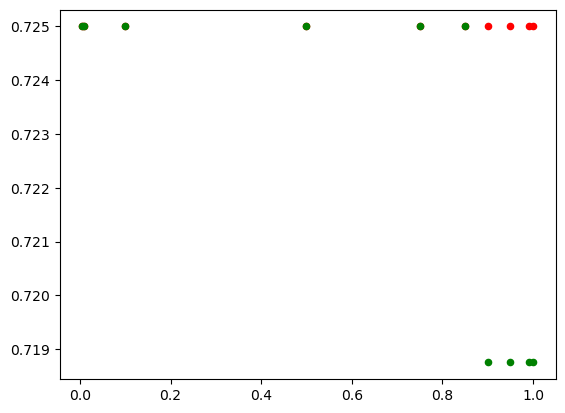

In [48]:
possible_C = [0.01, 0.005, 0.1, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1.0]
#, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0, 40.0, 100.0
train_scores = []
test_scores = []
cv_scores = []

for x in possible_C:
  #X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()
  svm = SVC(kernel="linear", C=x)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  cv_score = cross_val_score(svm, X_train, y_train, cv=5)
  # print(cv_score.shape)

  train_scores.append(train_acc)
  test_scores.append(test_acc)
  cv_scores.append(cv_score.mean())

jitter_amount = 0.01 # Adjust this value based on your data and desired effect
train_scores_jittered = train_scores + np.random.uniform(-jitter_amount, jitter_amount, len(train_scores))
test_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(test_scores))
cv_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(cv_scores))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(possible_C, train_scores, 
              s=20, color="red")

# ax1.scatter(possible_C, test_scores, 
#             s=20, color = "blue")

ax1.scatter(possible_C, cv_scores, 
            s=20, color = "green")

plt.show()

The lack of a nice edge is a sign this isnt a good fit

# Other kernels

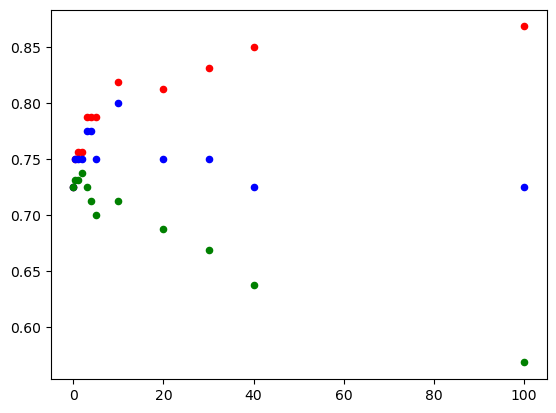

In [62]:
#while it is difficult to visualize the data to see what other kernels may be appropriate,
# we can try a few other standard kernels to see if they yield better results
possible_C = [0.01, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0, 40.0, 100.0]
# 0.005, 0.1,  0.75, 0.85, 0.9, 0.95, 0.99,
train_scores = []
test_scores = []
cv_scores = []

for x in possible_C:
  #X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()
  svm = SVC(kernel="poly", degree = 3, C=x)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  cv_score = cross_val_score(svm, X_train, y_train, cv=5)
  # print(cv_score.shape)

  train_scores.append(train_acc)
  test_scores.append(test_acc)
  cv_scores.append(cv_score.mean())

jitter_amount = 0.01 # Adjust this value based on your data and desired effect
train_scores_jittered = train_scores + np.random.uniform(-jitter_amount, jitter_amount, len(train_scores))
test_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(test_scores))
cv_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(cv_scores))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(possible_C, train_scores, 
              s=20, color="red")

ax1.scatter(possible_C, test_scores, 
             s=20, color = "blue")

ax1.scatter(possible_C, cv_scores, 
            s=20, color = "green")

plt.show()


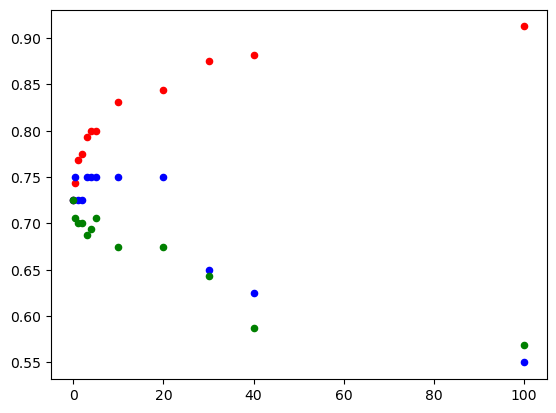

In [64]:
# rbf
possible_C = [0.01, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0, 40.0, 100.0]
# 0.005, 0.1,  0.75, 0.85, 0.9, 0.95, 0.99,
train_scores = []
test_scores = []
cv_scores = []

for x in possible_C:
  #X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()
  svm = SVC(kernel="rbf", gamma = 'auto', C=x)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  cv_score = cross_val_score(svm, X_train, y_train, cv=5)
  # print(cv_score.shape)

  train_scores.append(train_acc)
  test_scores.append(test_acc)
  cv_scores.append(cv_score.mean())

jitter_amount = 0.01 # Adjust this value based on your data and desired effect
train_scores_jittered = train_scores + np.random.uniform(-jitter_amount, jitter_amount, len(train_scores))
test_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(test_scores))
cv_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(cv_scores))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(possible_C, train_scores, 
              s=20, color="red")

ax1.scatter(possible_C, test_scores, 
             s=20, color = "blue")

ax1.scatter(possible_C, cv_scores, 
            s=20, color = "green")

plt.show()


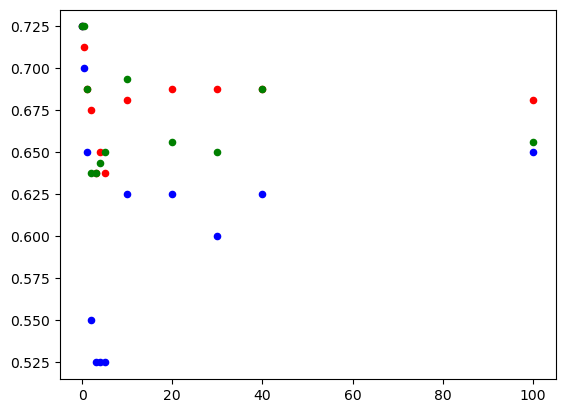

In [67]:
#sigmoid
possible_C = [0.01, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0, 40.0, 100.0]
# 0.005, 0.1,  0.75, 0.85, 0.9, 0.95, 0.99,
train_scores = []
test_scores = []
cv_scores = []

for x in possible_C:
  #X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()
  svm = SVC(kernel="sigmoid", gamma = 'auto', C=x)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  cv_score = cross_val_score(svm, X_train, y_train, cv=5)
  # print(cv_score.shape)

  train_scores.append(train_acc)
  test_scores.append(test_acc)
  cv_scores.append(cv_score.mean())

jitter_amount = 0.01 # Adjust this value based on your data and desired effect
train_scores_jittered = train_scores + np.random.uniform(-jitter_amount, jitter_amount, len(train_scores))
test_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(test_scores))
cv_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(cv_scores))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(possible_C, train_scores, 
              s=20, color="red")

ax1.scatter(possible_C, test_scores, 
             s=20, color = "blue")

ax1.scatter(possible_C, cv_scores, 
            s=20, color = "green")

plt.show()


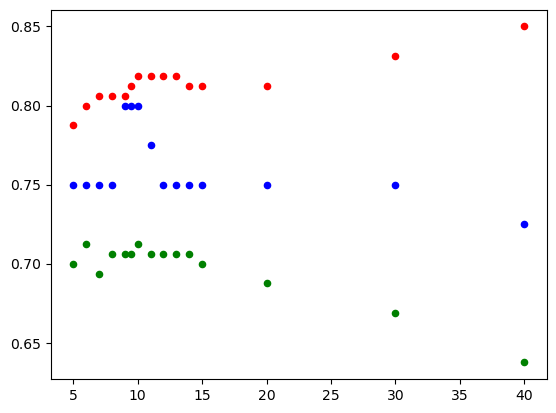

In [71]:
# degree 3 poly works best! lets see how good it can get

possible_C = [5.0, 6.0, 7.0, 8.0, 9.0, 9.5, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 20.0, 30.0, 40.0]
# 0.005, 0.1,  0.75, 0.85, 0.9, 0.95, 0.99,
train_scores = []
test_scores = []
cv_scores = []

for x in possible_C:
  #X_train, X_test, y_train, y_test, feature_cols, scaler = prepare_data()
  svm = SVC(kernel="poly", degree = 3, C=x)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  cv_score = cross_val_score(svm, X_train, y_train, cv=5)
  # print(cv_score.shape)

  train_scores.append(train_acc)
  test_scores.append(test_acc)
  cv_scores.append(cv_score.mean())

jitter_amount = 0.01 # Adjust this value based on your data and desired effect
train_scores_jittered = train_scores + np.random.uniform(-jitter_amount, jitter_amount, len(train_scores))
test_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(test_scores))
cv_scores_jittered = test_scores + np.random.uniform(-jitter_amount, jitter_amount, len(cv_scores))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.scatter(possible_C, train_scores, 
              s=20, color="red")

ax1.scatter(possible_C, test_scores, 
             s=20, color = "blue")

ax1.scatter(possible_C, cv_scores, 
            s=20, color = "green")

plt.show()


Cross Validation shows that degree 3 polynomial kernel with C = 10 produces best results for our data.